In [1]:
import numpy as np
from skimage import io

import tensorflow as tf

# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D


Using TensorFlow backend.


In [2]:
#(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


In [3]:
def load_data(path):
    import os
    labels = []
    data = []
    for i in os.listdir(path):
        #print()
        ic = io.imread_collection(path+i+"/*.png", path+i+"/*.jpg")
        labels.extend([i]* len(ic.files))
        for j in range(len(ic)):
            data.append(ic[j])
#             data.append(np.reshape(ic[j], (28*28)))
    return np.array(data), np.array(labels)

In [4]:
x_train, y_train = load_data("data/mnist/training/")
x_test, y_test = load_data("data/mnist/testing/")

In [5]:
import matplotlib.pyplot as plt
image_index = 5020 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

0


In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])


x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [7]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))


W0724 17:09:17.385389  5852 deprecation_wrapper.py:119] From c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [8]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

W0724 17:09:17.412391  5852 deprecation_wrapper.py:119] From c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0724 17:09:17.490396  5852 deprecation_wrapper.py:119] From c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 17:09:17.531398  5852 deprecation_wrapper.py:119] From c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0724 17:09:17.670406  5852 deprecation_wrapper.py:119] From c:\users\salah\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max

Epoch 1/10
60000/60000 [==============================] - 51s 844us/step - loss: 0.2110 - acc: 0.9375
Epoch 2/10
60000/60000 [==============================] - 41s 675us/step - loss: 0.0841 - acc: 0.9737
Epoch 3/10
60000/60000 [==============================] - 40s 675us/step - loss: 0.0570 - acc: 0.9829
Epoch 4/10
60000/60000 [==============================] - 41s 677us/step - loss: 0.0449 - acc: 0.9861
Epoch 5/10
60000/60000 [==============================] - 42s 704us/step - loss: 0.0349 - acc: 0.9882
Epoch 6/10
60000/60000 [==============================] - 42s 701us/step - loss: 0.0297 - acc: 0.9900
Epoch 7/10
60000/60000 [==============================] - 44s 730us/step - loss: 0.0251 - acc: 0.9918
Epoch 8/10
60000/60000 [==============================] - 43s 714us/step - loss: 0.0232 - acc: 0.9923
Epoch 9/10
60000/60000 [==============================] - 43s 713us/step - loss: 0.0184 - acc: 0.9938
Epoch 10/10
60000/60000 [==============================] - 43s 709us/step - loss: 

In [9]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 165us/step


[0.05994512938632542, 0.9857]

1


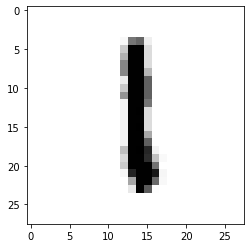

In [10]:
image_index = 1000
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
